# Reading Data

## Unzip File

In [1]:
!unzip Pathology_Project

Archive:  Pathology_Project.zip
   creating: Pathology_Project/713_1217Spectra_csv_Tranformed/
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4102.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4106.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4107.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4108.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4111.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4112.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4114.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4116.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4117.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4118.csv  
  inflating: Pathology_Project/713_1217Spectra_csv_Tranformed/._sample4119.csv  
  inflating: P

## Import Pandas

In [2]:
import pandas as pd

## Read Main File

In [3]:
df = pd.read_excel("Pathology_Project/Student_Version.xlsx")
df.head()

,num,sample,Survival
0,0,4102,232.0
1,1,4106,59.0
2,2,4107,213.0
3,3,4108,189.0
4,4,4111,221.0


In [4]:
survival = df["Survival"]
survival.head()

0    232.0
1     59.0
2    213.0
3    189.0
4    221.0
Name: Survival, dtype: float64

## Read the Valid Samples

In [5]:
valid_y = []
valid_X = []

for index, sample in df["sample"].items():
  try:
    data = pd.read_csv(f"Pathology_Project/713_1217Spectra_csv_Tranformed/sample{sample}.csv", header=None, names=["Column1", "Column2"])
    valid_X.append(data["Column2"])
    valid_y.append(survival[index])
  except Exception as e:
    pass

## Create `X` and `y` from Data

### Import Tensorflow

In [6]:
import tensorflow as tf

## Convert valid entries into tensors

### Converting y

In [7]:
y = tf.constant(valid_y, dtype=tf.float32)

### Converting X

In [8]:
X = tf.constant(valid_X)

In [9]:
X

<tf.Tensor: shape=(443, 2449), dtype=float64, numpy=
array([[0.23863198, 0.2384738 , 0.23841356, ..., 0.011241  , 0.01116362,
        0.01117005],
       [0.21647114, 0.21639721, 0.21640876, ..., 0.03038217, 0.03040887,
        0.03038161],
       [0.10939318, 0.10927065, 0.10918963, ..., 0.01247605, 0.01259158,
        0.01268792],
       ...,
       [0.16976222, 0.16963057, 0.16950262, ..., 0.01830115, 0.01835602,
        0.01842794],
       [0.11889417, 0.11915304, 0.1194432 , ..., 0.01657335, 0.01638672,
        0.01616103],
       [0.06705619, 0.06703395, 0.06692438, ..., 0.01473971, 0.01478087,
        0.01491791]])>

In [10]:
y

<tf.Tensor: shape=(443,), dtype=float32, numpy=
array([232.,  59., 213., 189., 221., 170., 211.,  36.,  93., 100., 115.,
       147., 216.,  38., 203., 215., 201., 153.,  61., 202., 214., 168.,
       206.,  61., 161., 182.,  71.,  73., 211.,  24., 172., 224., 143.,
       212., 202., 212., 199., 186., 212., 195., 119.,  89.,  62.,  52.,
       213., 183., 120., 211., 207., 178., 116., 198., 208.,  66., 207.,
       198., 203.,  82., 205., 209.,  49., 166., 137., 115., 104., 194.,
       201., 195., 221., 182., 138., 123., 199., 166.,  48., 193.,  91.,
       205.,  75., 205., 201., 204., 102., 108., 141., 206., 189., 112.,
       137., 150., 202.,  96., 199., 197., 118., 155.,  72., 198., 221.,
       176., 157.,  83., 188.,  88.,  94., 145., 165., 203., 203., 132.,
        80., 165., 201., 159., 163.,  64.,  31.,  95.,  57., 212., 116.,
       201., 102., 198., 217., 201.,  87.,  88.,  85., 197., 196., 197.,
       196.,  38., 194.,  96., 216., 216.,  41., 205., 213., 199.,  77.,
   

# Creating Model

In [11]:
# from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Train and Test Set **JUST KIDDING DO THIS LATER OR THIS IS USELESS**

Text(0.5, 0, 'Epochs')

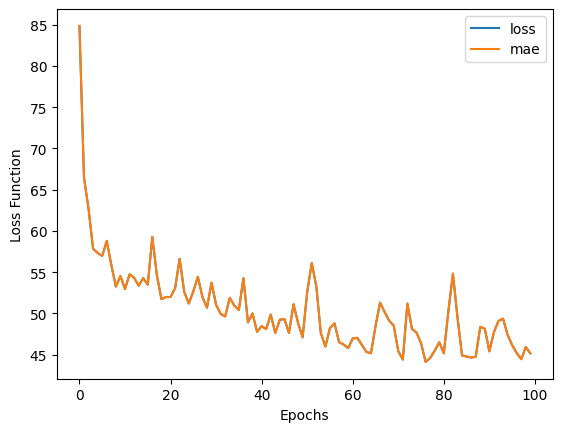

In [12]:
tf.random.set_seed(50)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2449),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(X, y, epochs=100, verbose=0)

pd.DataFrame(history.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")

In [15]:
model.save("model.keras")

In [17]:

tf.converters.save_keras_model(model, tfjs_target_dir)

AttributeError: module 'tensorflow' has no attribute 'converters'